In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import math

In [2]:
df = pd.read_csv(r"E:\Python-Notebooks\big_data_challenge\datasets_bdc\ren-energy-north-america.csv")
df.head(10)

,Year,Marine,Geothermal,Bioenergy-Renewable Municipal Waste,Bioenergy-Liquid Biofuels,Bioenergy-Biogas,Bioenergy-Solid Biofuels,Solar-Thermal,Solar-Photovoltaic,Wind-Offshore,Wind-Onshore,Hydropower-Renewable Hydropower,Hydropower-Mixed Plants,Pumped Storage
0,2000,20,3648.0,1320.5,0,992,7677,419,197,0,2486,156272,0,19699
1,2001,20,3054.0,12757.5,0,994,8129,246,237,0,4012,155479,0,19843
2,2002,20,3095.0,1253.0,0,1067,8268,202,281,0,4596,158064,0,20550
3,2003,20,3093.0,1226.5,35,1145,8532,388,321,0,6340,158579,0,20699
4,2004,20,3112.0,1103.5,65,1115,8816,388,393,0,6918,158925,0,20941
5,2005,20,3245.0,1101.0,67,1236,8652,388,527,0,9401,159970,0,21524
6,2006,20,3234.0,1111.5,67,1315,8858,401,736,0,12853,161313,0,21638
7,2007,20,3174.0,1126.5,75,1629,9244,465,1022,0,18456,162782,0,22063
8,2008,20,3192.0,1125.0,82,1715,9200,465,1210,0,27089,163647,0,22035
9,2009,20,3347.0,1131.5,183,1728,9273,472,1746,0,38004,164556,12308,22337


In [3]:
energy_list = ['Marine', 'Geothermal', 'Bioenergy', 'Solar', 'Wind', 'Hydropower', 'Pumped Storage']
sub_energy_dict = {'Marine':['Marine'], 'Geothermal':['Geothermal'], 
                   'Bioenergy':['Bioenergy-Renewable Municipal Waste', 'Bioenergy-Liquid Biofuels', 'Bioenergy-Biogas', 'Bioenergy-Solid Biofuels'],
                  'Solar':['Solar-Thermal', 'Solar-Photovoltaic'],
                  'Wind':['Wind-Offshore', 'Wind-Onshore'],
                  'Hydropower':['Hydropower-Renewable Hydropower', 'Hydropower-Mixed Plants'],
                  'Pumped Storage':['Pumped Storage']}

In [6]:
def get_caps(df, energy):
    
    dict = {}

    for i in range(len(df)):
        sum = 0
        for sub in sub_energy_dict[energy]:
            val = float(df.loc[i, sub])
            sum += val
            
            if sub not in dict:
                dict[sub] = []
            
            dict[sub].append(val)
        
        if 'total' not in dict:
            dict['total'] = []
    
        dict['total'].append(sum)
        
    return dict

In [8]:
energy_dict = {}

for en in energy_list:
    dict = get_caps(df, en)
    energy_dict[en] = dict

print(energy_dict)

{'Marine': {'Marine': [20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0], 'total': [20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0]}, 'Geothermal': {'Geothermal': [3648.0, 3054.0, 3095.0, 3093.0, 3112.0, 3245.0, 3234.0, 3174.0, 3192.0, 3347.0, 3370.0, 3296.0, 3416.0, 3430.0, 3327.0, 3448.0, 3443.0, 3408.7, 3394.6, 3490.6, 3492.4], 'total': [3648.0, 3054.0, 3095.0, 3093.0, 3112.0, 3245.0, 3234.0, 3174.0, 3192.0, 3347.0, 3370.0, 3296.0, 3416.0, 3430.0, 3327.0, 3448.0, 3443.0, 3408.7, 3394.6, 3490.6, 3492.4]}, 'Bioenergy': {'Bioenergy-Renewable Municipal Waste': [1320.5, 12757.5, 1253.0, 1226.5, 1103.5, 1101.0, 1111.5, 1126.5, 1125.0, 1131.5, 1127.5, 1136.5, 1140.0, 1152.5, 1153.5, 1162.5, 1162.5, 1160.0, 1154.5, 1098.0, 1098.0], 'Bioenergy-Liquid Biofuels': [0.0, 0.0, 0.0, 35.0, 65.0, 67.0, 67.0, 75.0, 82.0, 183.0, 183.0, 183.0, 204.0, 

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


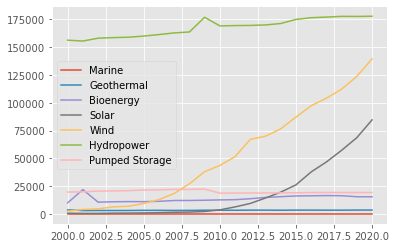

In [15]:
#energy types

years = [*range(2000, 2021)]
print(years)

for en in energy_list:
    vals = energy_dict[en]['total']
    #print(len(vals))
    #print(len(years))
    
    plt.plot(years, vals, label=en)

plt.legend(loc='best')
plt.show()

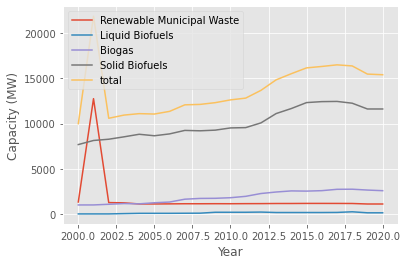

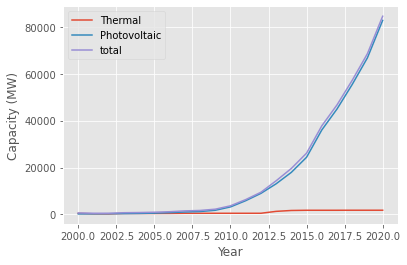

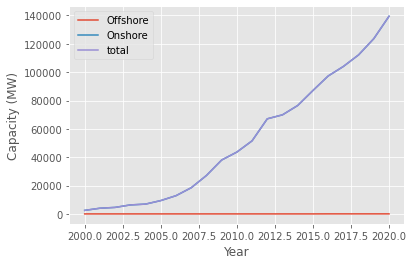

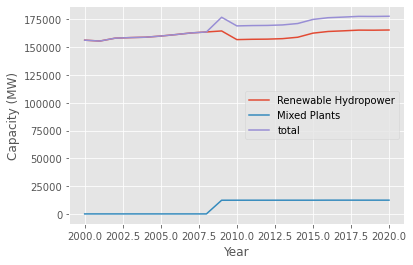

In [25]:
for en in energy_list[2:-1]:
    for sub in energy_dict[en]:
       # print(sub)
        vals = energy_dict[en][sub]
        label = str()
        if sub != 'total':
            label = sub[sub.index('-')+1:]
        else: 
            label = 'total'
        plt.plot(years, vals, label=label)
    
    plt.xlabel('Year')
    plt.ylabel('Capacity (MW)')
    plt.legend(loc='best')
    plt.show()

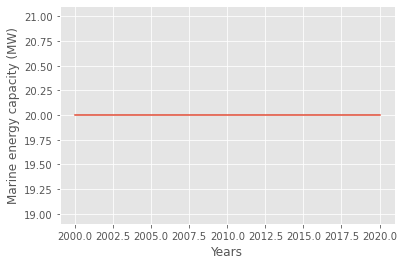

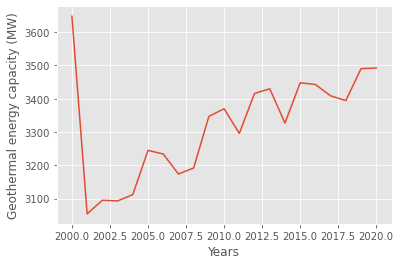

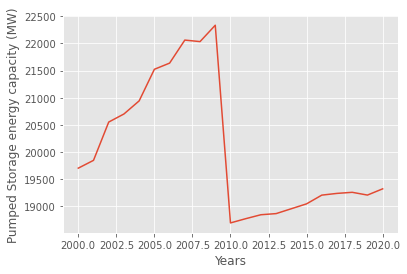

In [28]:
for en in ['Marine', 'Geothermal', 'Pumped Storage']:
    vals = energy_dict[en]['total']
    #print(len(vals))
    #print(len(years))
    
    plt.plot(years, vals)
    plt.ylabel(en+' energy capacity (MW)')
    plt.xlabel('Years')
    plt.show()